# Econ 570 Final Project
## By Thomas Morissette

# Time Series Analysis of Deutche Bank Stock Performance Using Arima and LSTM Machine Learning Models

## 1. Introduction

The overall purpose of thhis paper is to determine whether the closing stock prices of deutche bank stock can be accuratly predicted by two seperate machine learning models. Furthermore, I will be comparing the viabilitiy of the selected models in order to determine which would be a better fit for prediction using the standard method of comparing the Root Mean Squared Errors of the predicted vs actual values. As a research question, these puropses can be summarized as:

- Can we use machine learning to accuratly predict the closing price of Deutche Bank Stock?
- Which Model (Arima vs. LSTM) is more accurate at forecasting the closing price of Deutche Bank Stock?


These reseach questions are fundamentally important in the realms of finance and economics, as the continual desire to create more sophisticated and accurate models for forecasting requires the creation of competing models in order to determine overall efficacy. 

Standard ARIMA models are often used in time series forecasting and stand as the most basic and widly used meathods of machine learning in order to create predictions with time series data. In this project I will compare various parameters associated with Arima models in order to select the overall best model for prediction.

Long Short Term Memory models are an advanced neural network model that allows the model to "forget" information through separate itterations in order to determine the most accurate forecasting model. Long Short Term Memory models are fairly new and incredibly complicated to implement correctly. 

This paper will build a basic LSTM model and compare it against an ARIMA model in the forecasting of Deutche Bank closing stocks. This is not to say that these models will provide completely accurate predictions of stock performance, but instead will be evaluated for overall efficacy between the two models themselves. 

## 2. Data Aquisition and Literature Review

Overall, there are not very many papers specifically discussing comparisions between LSTM models and ARIMA models in terms of efficency of forecasting. The primary paper that has researched this comparison is by Namini and Namin(2018). This paper tried to determine whether the newer deep learning LSTM model outperformes the standard ARIMA model in forecasting Time Series. The paper found that even standard LSTM models have a reduction of error rates between 84-87% in comparison with Arima Models on the same dataset.

In terms of Literature discussing the effacy of Arima Models and LSTM models specifically, there is a large amount of information and studies on overall model efficacy. 

Mondal, Prapanna, et al.(2014) Did a comprehensive study on the efficacy or Arima models and found them to be robust and reliable in the forecasting of time series data.

Gers, F.A., Eck, D., Schmidhuber, J. (2002) highlight how LSTM models are specifically useful for time series modeling that is impossible to acheive with typical non-machine learning model specifications. 

These are only a few of the numerous studies done on the efficacy of these models. Further research into these models will find many different papers written into their overall efficiency.


Data aquisition for this project was relativly simple. The data used was gathered from Yahoo Finance's repository of historical stock information on deutche bank. No further additions, modifications, or transformations of the data were applied. Some thought was put into applying logarithmic transformations to the closing prices of Deutche Bank Stock, but this was disregarded as unnecessary as the application of a logarithmic trasformation did not invoke stationarity in the time series for the models. Thus, a simple first differencing was used in order to make the time series stationary for applications in the models.

Furthermore, no ourlires were removed from the data as it was deemed unnecessary due to the lack of large variances in the data set over short periods of time. This is due to the fact that the data gathered for this project Ranges from May 4, 2010 to May 4, 2022, convienietly avoiding the issues associated with the decline in bank stock performance due to the recession of 2008.


## 3. Modeling

Two seperate models were used in the analysis of Deutche Bank stock performance and subsequent forecasting. The first model is a typical Arima model while the second is an LSTM model. Both models will be compared at the end of this section in order to determine overall model efficacy.

In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score, log_loss
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from sklearn.preprocessing import MinMaxScaler
!pip install tensorflow 
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import numpy
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)
!pip install pmdarima

## 3.1 ARIMA Model without covariates

In [2]:

df = pd.read_csv('file:///Users/thomasmorissette/Desktop/DB-2.csv')
close=df.reset_index()['Close']

df['Date'] = pd.to_datetime(df['Date'], format = '%Y %m %d')
close_ts=df[['Date','Close']]

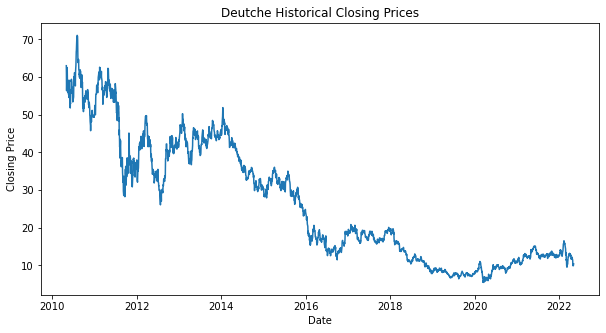

In [3]:

plt.rcParams['figure.figsize'] = (10, 5)
plt.title('Deutche Historical Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(close_ts['Date'],close_ts['Close'])
plt.show()

 10 Year stock performance without logarithmic transformations

In [4]:
stats.describe(close)

DescribeResult(nobs=3022, minmax=(5.48, 71.078247), mean=26.433995066512246, variance=263.48169350194695, skewness=0.5441121756648474, kurtosis=-0.9561424842938857)

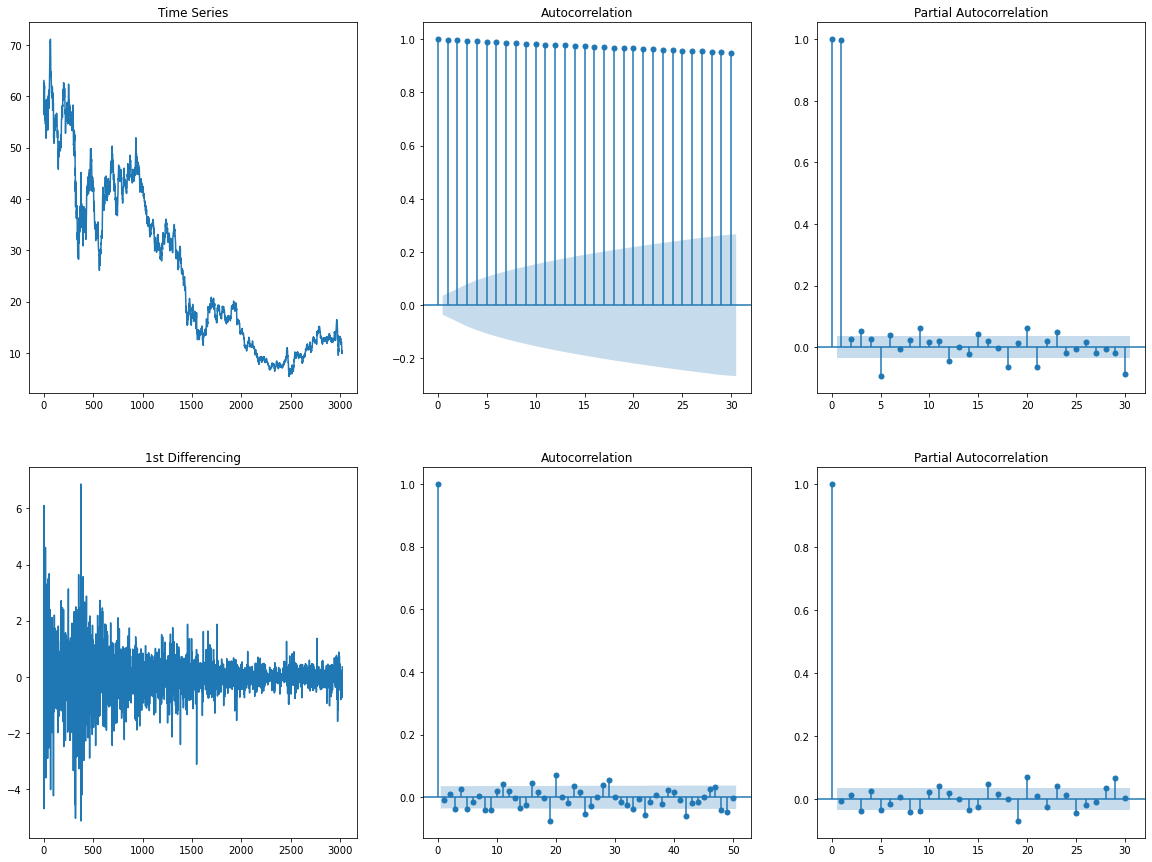

In [5]:
plt.rcParams['figure.figsize'] = (20, 15)
fig, axes = plt.subplots(2,3)

axes[0,0].plot(close); axes[0,0].set_title('Time Series')
plot_acf(close,lags=30,ax=axes[0,1])
plot_pacf(close,lags=30,ax=axes[0,2])

first_diff = close.diff()
axes[1,0].plot(first_diff); axes[1,0].set_title('1st Differencing')
plot_acf(first_diff.dropna(),lags=50,ax=axes[1,1])
plot_pacf(first_diff.dropna(),lags=30,ax=axes[1,2])

plt.show()

In [6]:
adfTest = adfuller(close,autolag='AIC')
adfTest_firstdiff = adfuller(first_diff.dropna(),autolag='AIC')

pd.DataFrame({'original':adfTest[0:4],'firstdiff':adfTest_firstdiff[0:4]},index=['ADF Test Stat','P-Val','#lags','#obs'])

original     firstdiff
ADF Test Stat    -1.876932 -9.394385e+00
P-Val             0.342989  6.432720e-16
#lags            29.000000  2.800000e+01
#obs           2992.000000  2.992000e+03

Overall analysis of the Auto correlation, partial autocorrelation, and time series graphs of the close variable indicate that a level of differening is required in order to acheive stationarity within the time series. This is supported by a formal adf test run on the variable, finind that the non differenced series is indeed non-stationary. After differencing, we can see that the series has become stationary through graphical analysis as well as formal testing.

The AC and PAC graphs of the first differenced variable indicate that this arima function would be best served with an Arima of (1,1,1) in order to capture the lags associated with the series, Furthermore, no graphhical indications of seasonal effects can be observed though analysis of the PAC and AC plots.

/var/folders/8j/gfqm5z_93z12d_08vmpjm1pc0000gn/T/ipykernel_12485/3810345523.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(close, model='multiplicative', freq = 30)


<Figure size 1440x1080 with 0 Axes>

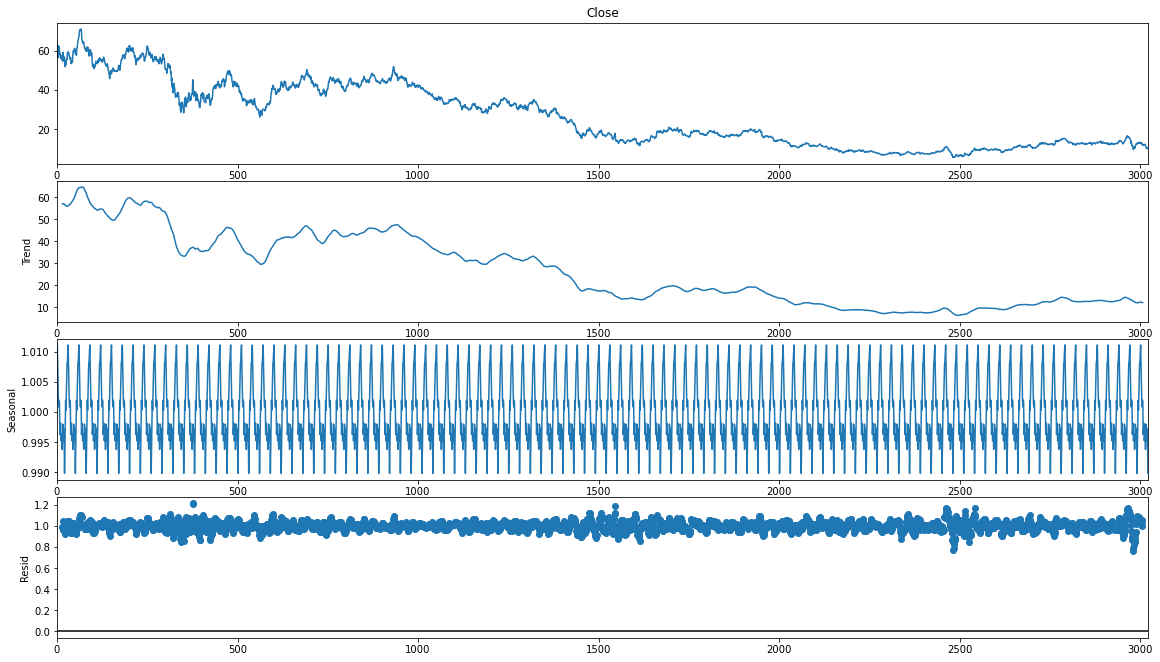

In [7]:
result = seasonal_decompose(close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

Overall decomposition of Trend, Seasonality, and Residuals of the time series.

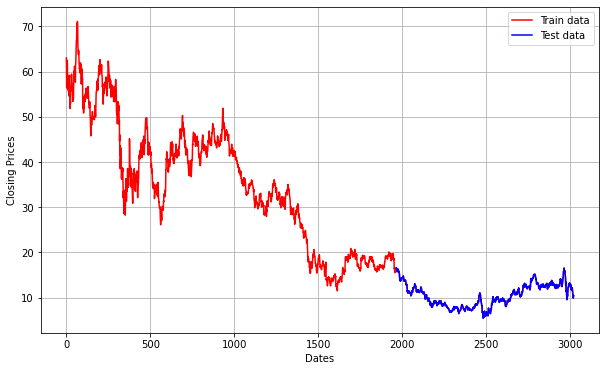

In [8]:
train_data, test_data = close[3:int(len(close)*0.65)], close[int(len(close)*0.65):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(close, 'red', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Seperation of Dataset into training data and testing data using approximatly 65% of the data set to train the model.

Performing stepwise search to minimize aic
 ARIMA(4,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=4.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5226.220, Time=0.31 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5227.697, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5227.723, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5225.189, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5225.720, Time=0.68 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 5.450 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1961
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2611.595
Date:                Thu, 05 May 2022   AIC                           5225.189
Time:                        15:55:12   BIC                           5230.770
Sample:                             0   HQIC                          5227.241
               

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


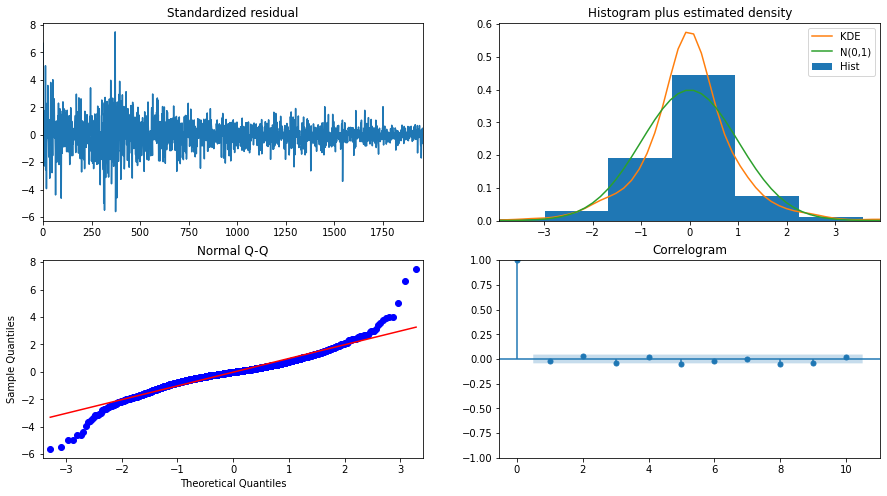

In [9]:
model_autoARIMA = auto_arima(train_data, start_p=4, start_q=5,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

Interestingly enough, the model selected by the autoarima function to be the most accurate is not a (1,1,1) model as seen from the AC and PAC graphs but instead a (5,1,5) model. This seemed irregular to me, so I also tested a (1,1,1) model and compared RMSE values to determine which model is more accurate. 

In [10]:

model = ARIMA(train_data, order=(5,1,5))  
model1=ARIMA(train_data, order=(1,1,1)) 
fitted = model.fit(disp=-1)  
fitted1=model1.fit(disp=-1)

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn

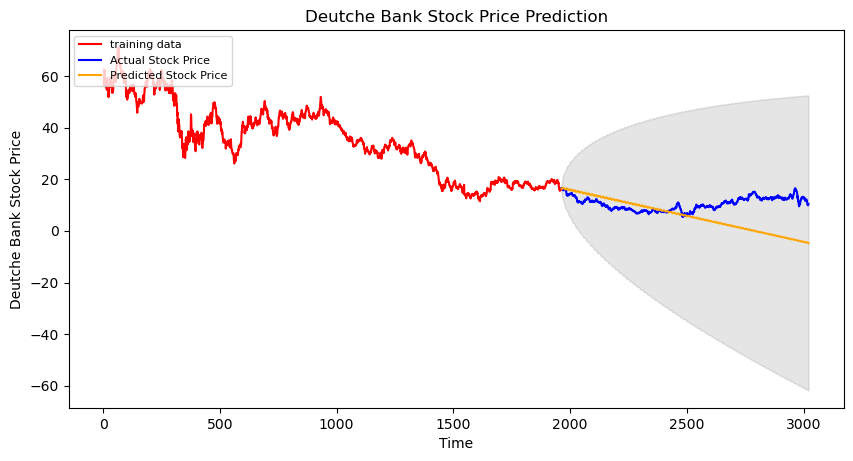

In [11]:
fc, se, conf = fitted.forecast(1058, alpha=0.05)

fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, color= 'red',label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Deutche Bank Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Deutche Bank Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

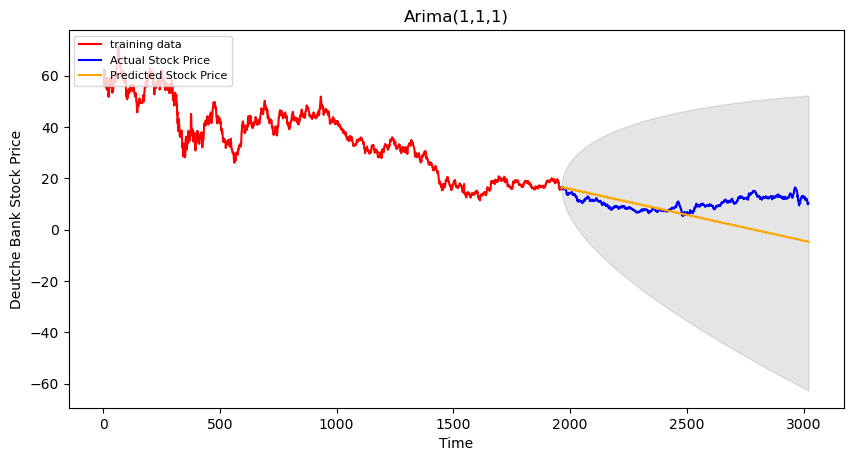

In [12]:
fc1, se, conf = fitted1.forecast(1058, alpha=0.05)

fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, color= 'red',label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Arima(1,1,1)')
plt.xlabel('Time')
plt.ylabel('Deutche Bank Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [13]:
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

RMSE: 8.529831173233509
MAPE: 0.5603853958336367


In [14]:
rmse = math.sqrt(mean_squared_error(test_data, fc1))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc1 - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

RMSE: 8.792967580517644
MAPE: 0.5705587948422386


In comparing these two seperate Arima Models we find that the model specified by the auto.arima function, arima(5,1,5), performes better than the arima function that the AC and PAC suggested for use. The arima (5,1,5) function will be used to compare against the LSTM model.

## 3.2 LSTM Model

In [15]:
close=df.reset_index()['Close']
close.shape

(3022,)

In [16]:

scale=MinMaxScaler(feature_range=(0, 1))
close=scale.fit_transform(np.array(close).reshape(-1,1))
close.shape

(3022, 1)

In [17]:
training_size =int(len(close)*0.65)
test_size=len(close)-training_size
train_data, test_data=close[0:training_size,:],close[training_size:len(close),:1]

In [18]:
train_data

array([[0.87723093],
       [0.84755684],
       [0.7758446 ],
       ...,
       [0.16204703],
       [0.16158968],
       [0.16738251]])

In [19]:
training_size, test_size

(1964, 1058)

In [20]:

def matrix(dataset, time_step = 1):
    dataX, dataY =[], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0] 
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)

In [21]:

time_step = 100
X_train, Y_train = matrix(train_data, time_step)
X_test, Ytest = matrix(test_data, time_step)

In [22]:
X_train= X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [23]:
print(X_train.shape),print(Y_train.shape)

(1863, 100, 1)
(1863,)


(None, None)

In [24]:

model=Sequential()
model.add(LSTM(50,return_sequences= True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences= True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error', optimizer='adam')
model.summary()

2022-05-05 15:55:30.235365: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train,Y_train,validation_data=(X_test, Ytest),epochs=50,batch_size=60,verbose=1)

Epoch 1/50
32/32 [==============================] - 11s 210ms/step - loss: 0.0351 - val_loss: 0.0057
Epoch 2/50
32/32 [==============================] - 6s 179ms/step - loss: 0.0021 - val_loss: 2.2437e-04
Epoch 3/50
32/32 [==============================] - 6s 182ms/step - loss: 0.0014 - val_loss: 5.5719e-04
Epoch 4/50
32/32 [==============================] - 6s 181ms/step - loss: 0.0014 - val_loss: 2.1942e-04
Epoch 5/50
32/32 [==============================] - 6s 180ms/step - loss: 0.0013 - val_loss: 2.3578e-04
Epoch 6/50
32/32 [==============================] - 6s 187ms/step - loss: 0.0017 - val_loss: 2.0579e-04
Epoch 7/50
32/32 [==============================] - 6s 184ms/step - loss: 0.0013 - val_loss: 2.2211e-04
Epoch 8/50
32/32 [==============================] - 6s 190ms/step - loss: 0.0011 - val_loss: 2.1332e-04
Epoch 9/50
32/32 [==============================] - 6s 188ms/step - loss: 0.0011 - val_loss: 1.8708e-04
Epoch 10/50
32/32 [==============================] - 6s 188ms/step 

In [26]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [27]:

train_predict = scale.inverse_transform(train_predict)
test_predict = scale.inverse_transform(test_predict)

In [28]:
RMSE1=math.sqrt(mean_squared_error(Ytest,test_predict))

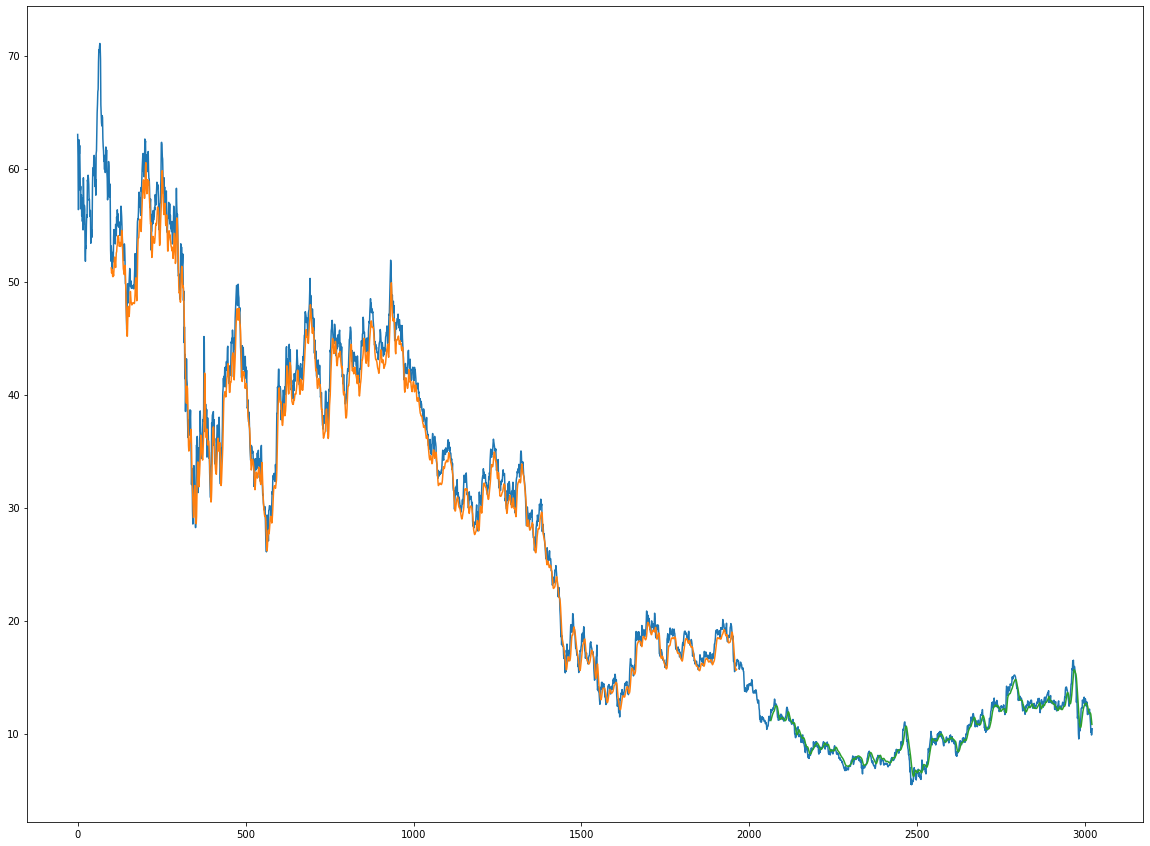

In [29]:
 look_back=100
trainPredictPlot = numpy.empty_like(close)
trainPredictPlot[:,:] = numpy.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = numpy.empty_like(close)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scale.inverse_transform(close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

It is interesting to note that as per Siami-Namini, Sima, and Akbar Siami Namin, only 50 epochs were used in the creation of this model as they found that the inclusion of large amoiunts of epochs does not increase the predictive power of the LSTM model.

In [31]:
print('RMSE LTSM: '+str(RMSE1))
print('RMSE ARIMA: '+str(rmse))

RMSE LTSM: 10.335450891516905
RMSE ARIMA: 8.792967580517644


## 4/5. Findings and Conclusion

The findings for this project are that while both models can be considered accurate predictors of Deutche Bank Stock closing prices, the regular ARIMA model is a better fit and more effective at prediction with a RMSE score of 8.792967580517644 as compared to the RMSE score of the LSTM model of 10.311423993338872.

The differences in efficiency between these models could be due to the following:
- Lack of specificity in determining the best LSTM model
- Arima Models are simply better fits for simple time series data

In general this project was instrumental in learning about LSTM models as well as comparing their efficacy to ARIMA models. The findings of this project seem to support the views of Gers, F.A., Eck, D., Schmidhuber, J. (2002) in that LSTM models appear to be less effective at predicting simple time series data than Standard Arima Models

The next steps for the continuity of this project would be increased focus on the optimization of LSTM models and their implimentation. As opposed to ARIMA models, Neural network models a la LSTM models are far more conceptually difficult to implement. The model used in this paper is simply a starting point to understanding and implementing these powerful new tools for data analysis. 


# Bibliograpy


Gers, F.A., Eck, D., Schmidhuber, J. (2002). Applying LSTM to Time Series Predictable Through Time-Window Approaches. In: Tagliaferri, R., Marinaro, M. (eds) Neural Nets WIRN Vietri-01. Perspectives in Neural Computing. Springer, London. https://doi.org/10.1007/978-1-4471-0219-9_20

Mondal, Prapanna, et al.(2014) Study of Effectiveness of Time Series Modeling (ARIMA) in Forecasting ... https://www.researchgate.net/publication/271910974_STUDY_OF_EFFECTIVENESS_OF_TIME_SERIES_MODELING_ARIMA_IN_FORECASTING_STOCK_PRICES. 

Siami-Namini, Sima, and Akbar Siami Namin. “Forecasting Economics and Financial Time Series: Arima vs. LSTM.” ArXiv.org, 16 Mar. 2018, https://arxiv.org/abs/1803.06386. 
